In [1]:
%cd ..

/home/jupyter-tim/ba-tim


In [33]:
from drlqap.taskgenerators import generators, RandomWeightsTaskGenerator, RandomMatricesTaskGenerator, LinearTaskGenerator
import scipy.optimize
from drlqap.simplesolver import solve_qap_backtracking, solve_qap_maxgreedy, solve_qap_faq, solve_random
from drlqap.gurobi import solve_qap_gurobi
import numpy as np
from drlqap.qap import QAP
from drlqap.evaltools import load_checkpoints
from pathlib import Path
import random
import matplotlib.pyplot as plt

In [ ]:
# Clears results
results = {}

In [70]:
agents = {}
agents["dqn_medium"] = load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1'))
agents["dqn_small"] = load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1'))
agents["dqn_mini"] = load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_mini/lr5e-4_s1'))
agents["dqn_bi"] = load_checkpoints(Path('runs/dqn_bi_increasing/lr5e-4_s1'))
agents["a2c_inc"] = load_checkpoints(Path('runs/a2c_ms100x_increasing/lr8e-5_s1'))
agents["a2c_medium"] = load_checkpoints(Path('runs/a2c_ms100x_mediumrandoms/lr4e-5_s1'))
agents["reinforce"] = load_checkpoints(Path('runs/reinforce_ms100x_smallrandoms/lr1e-4_s4/'))

runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_0.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_1000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_2000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_3000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_4000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_5000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_6000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_7000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_8000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_9000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_end.pth
runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1/checkpoint_0.pth
runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1/checkpoint_1000.pth
runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1/checkpoint_2000.pth
runs/dqn_dense_ms_ec_eps0_smal

In [71]:
def evaluate(solver, problem, samples):
    if type(problem) == str:
        generator = generators[problem]
    else:
        generator = problem
    qaps = [generator.sample() for i in range(samples)]
    return evaluate_set(solver, qaps)
    
def evaluate_set(solver, problems):
    values = []
    correct = 0
    for qap in problems:
        v_solver, assignment = solver(qap)
        v = qap.compute_value(assignment)
        if not np.isclose(v, v_solver):
            print (f"solver outputs incorrect value (got {v_solver}, actual {v})")
        values.append(v)
    mean = np.mean(values)
    print(f"mean: {mean}")
    return mean

In [98]:
problems = {}
problems["small"] = [RandomWeightsTaskGenerator(8).sample() for i in range(20)]
problems["medium"] = [RandomWeightsTaskGenerator(16).sample() for i in range(20)]
problems["large"] = [RandomWeightsTaskGenerator(32).sample() for i in range(20)]
problems["64"] = [RandomWeightsTaskGenerator(64).sample() for i in range(20)]
problems["small_rm"] = [RandomMatricesTaskGenerator(8).sample() for i in range(20)]
problems["mini_lap"] = [LinearTaskGenerator(2).sample() for i in range(100)]

In [73]:
def sequence_evaluation(agents, problems):
    return [evaluate_set(agent.solve, problems) for agent in agents]

In [74]:
def evaluate_and_store(agent_name, problem_name):
    if (agent_name, problem_name) not in results:
        results[agent_name, problem_name] = sequence_evaluation(agents[agent_name], problems[problem_name])

# Computations

## n=32

In [75]:
for agent_name in ["dqn_medium", "dqn_small", "dqn_bi", "dqn_mini"]:
    evaluate_and_store(agent_name, "large")

In [76]:
for agent_name in ["a2c_inc", "a2c_medium", "reinforce"]:
    evaluate_and_store(agent_name, "large")

mean: 246.58016967773438
mean: 248.45748901367188
mean: 247.00613403320312
mean: 247.6533966064453
mean: 246.8616943359375
mean: 248.64035034179688
mean: 244.5510711669922
mean: 245.54983520507812
mean: 245.2166748046875
mean: 242.85623168945312
mean: 244.7107391357422
mean: 242.48806762695312
mean: 239.0592803955078
mean: 237.860595703125
mean: 237.37918090820312
mean: 239.2417449951172
mean: 238.0290069580078
mean: 237.9745635986328
mean: 238.9172821044922
mean: 237.87490844726562
mean: 237.6074676513672
mean: 236.2102508544922
mean: 238.3804931640625
mean: 238.007080078125
mean: 236.5045623779297
mean: 237.15982055664062
mean: 236.77474975585938
mean: 237.11715698242188
mean: 237.81106567382812
mean: 237.95858764648438
mean: 236.6878204345703


In [77]:
evaluate_set(solve_qap_faq, problems["large"])

mean: 211.3382110595703


211.33821

## n=16

In [78]:
for agent_name in ["dqn_medium", "dqn_small", "dqn_bi", "dqn_mini"]:
    evaluate_and_store(agent_name, "medium")

In [79]:
for agent_name in ["a2c_inc", "a2c_medium", "reinforce"]:
    evaluate_and_store(agent_name, "medium")

mean: 58.88721466064453
mean: 58.4616584777832
mean: 58.91162872314453
mean: 59.31108474731445
mean: 59.19902801513672
mean: 58.9632568359375
mean: 58.73741912841797
mean: 58.8768424987793
mean: 59.080360412597656
mean: 57.548301696777344
mean: 58.594764709472656
mean: 57.84306716918945
mean: 56.052772521972656
mean: 55.5428466796875
mean: 55.30781173706055
mean: 55.72944259643555
mean: 55.0644645690918
mean: 55.118553161621094
mean: 55.295982360839844
mean: 55.1192741394043
mean: 54.68891525268555
mean: 54.825538635253906
mean: 54.74828338623047
mean: 53.61749267578125
mean: 55.00756072998047
mean: 54.242897033691406
mean: 54.86669921875
mean: 55.00465774536133
mean: 54.92704391479492
mean: 54.61389923095703
mean: 54.83373260498047


In [80]:
evaluate_set(solve_qap_faq, problems["medium"])

mean: 48.59722137451172


48.59722

## n=8

In [81]:
for agent_name in ["dqn_medium", "dqn_small", "dqn_bi", "dqn_mini"]:
    evaluate_and_store(agent_name, "small")

In [82]:
for agent_name in ["a2c_inc", "a2c_medium", "reinforce"]:
    evaluate_and_store(agent_name, "small")

mean: 14.684774398803711
mean: 14.635391235351562
mean: 14.424184799194336
mean: 14.319561958312988
mean: 14.50621223449707
mean: 14.031639099121094
mean: 14.144430160522461
mean: 14.307711601257324
mean: 14.7169189453125
mean: 13.714381217956543
mean: 14.185809135437012
mean: 14.501620292663574
mean: 13.64271068572998
mean: 13.253072738647461
mean: 13.150733947753906
mean: 12.988141059875488
mean: 12.997026443481445
mean: 13.119100570678711
mean: 13.035985946655273
mean: 12.948872566223145
mean: 12.873672485351562
mean: 12.892677307128906
mean: 12.900339126586914
mean: 13.036458015441895
mean: 12.73160457611084
mean: 12.746427536010742
mean: 12.765213012695312
mean: 13.112808227539062
mean: 12.67055606842041
mean: 12.711341857910156
mean: 12.832234382629395


In [83]:
evaluate_set(solve_qap_faq, problems["small"])

mean: 11.846467971801758


11.846468

In [84]:
evaluate_set(solve_qap_backtracking, problems["small"])

mean: 11.172597885131836


11.172598

In [85]:
evaluate_set(solve_random, problems["small"])

mean: 14.314580917358398


14.314581

## n=2 linear only

In [86]:
for agent_name in ["dqn_medium", "dqn_small", "dqn_bi", "dqn_mini", "a2c_inc", "a2c_medium", "reinforce"]:
    evaluate_and_store(agent_name, "mini_lap")

mean: 1.072780728340149
mean: 1.0481089353561401
mean: 1.0108802318572998
mean: 0.9861294031143188
mean: 1.0103702545166016
mean: 1.0933177471160889
mean: 1.0362873077392578
mean: 1.0412646532058716
mean: 1.0487949848175049
mean: 1.0188498497009277
mean: 1.0301045179367065
mean: 1.0473904609680176
mean: 1.037811517715454
mean: 1.047775149345398
mean: 1.0474426746368408
mean: 1.0322294235229492
mean: 1.0425010919570923
mean: 1.0040477514266968
mean: 1.0178755521774292
mean: 0.9614018201828003
mean: 0.9525576829910278
mean: 0.9634465575218201
mean: 0.9591584205627441
mean: 0.9800944328308105
mean: 0.9766215682029724
mean: 0.9777514934539795
mean: 1.0007094144821167
mean: 0.9864516258239746
mean: 0.9487751722335815
mean: 0.9933615326881409
mean: 1.0350528955459595


# n=64

In [100]:
for agent_name in ["reinforce", "a2c_medium"]:
    evaluate_and_store(agent_name, "64")

mean: 1009.72607421875
mean: 1004.73193359375
mean: 1004.9613037109375
mean: 1003.5872192382812
mean: 999.39697265625
mean: 1001.5758666992188
mean: 992.4901123046875
mean: 1005.8356323242188
mean: 998.1541137695312
mean: 991.0018310546875
mean: 1000.0128784179688
mean: 989.53515625
mean: 983.89306640625
mean: 983.7642822265625
mean: 982.9913940429688
mean: 984.6497802734375
mean: 984.0855712890625
mean: 985.6947021484375
mean: 982.7579345703125
mean: 983.83984375
mean: 978.8904418945312
mean: 982.2911987304688
mean: 980.7371826171875
mean: 982.9489135742188
mean: 981.5803833007812
mean: 982.3375244140625
mean: 983.2813720703125
mean: 979.92236328125
mean: 981.6748046875
mean: 981.1231689453125
mean: 980.86962890625
mean: 1007.2791137695312
mean: 1029.475341796875
mean: 1030.642822265625
mean: 1027.514404296875
mean: 1023.7923583984375
mean: 1020.7457275390625
mean: 1011.1600341796875
mean: 1008.2275390625
mean: 997.04833984375
mean: 1003.6301879882812
mean: 1007.1306762695312
mean: 10

# Plots

Text(0.5, 1.0, 'Performance on n=32')

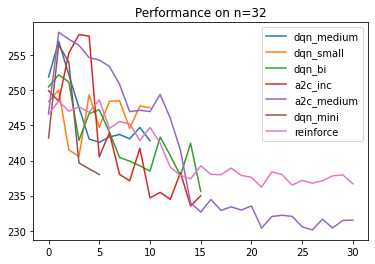

In [97]:
for agent_name in ["dqn_medium", "dqn_small", "dqn_bi", "a2c_inc", "a2c_medium", "dqn_mini", "reinforce"]:
    plt.plot(results[agent_name, "large"], label=agent_name)
plt.legend()
plt.title("Performance on n=32")

Text(0.5, 1.0, 'Performance on n=16')

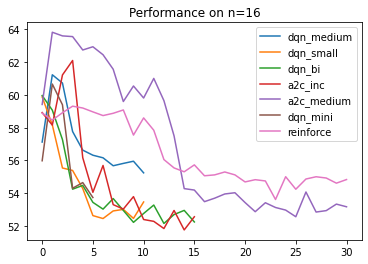

In [93]:
for agent_name in ["dqn_medium", "dqn_small", "dqn_bi", "a2c_inc", "a2c_medium", "dqn_mini", "reinforce"]:
    plt.plot(results[agent_name, "medium"], label=agent_name)
plt.legend()
plt.title("Performance on n=16")

Text(0.5, 1.0, 'Performance on n=8')

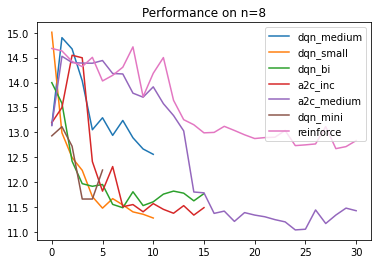

In [96]:
for agent_name in ["dqn_medium", "dqn_small", "dqn_bi", "a2c_inc", "a2c_medium", "dqn_mini", "reinforce"]:
    plt.plot(results[agent_name, "small"], label=agent_name)
plt.legend()
plt.title("Performance on n=8")

Text(0.5, 1.0, 'Performance on n=2')

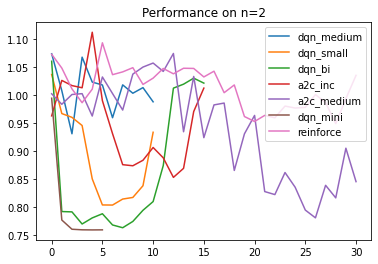

In [95]:
for agent_name in ["dqn_medium", "dqn_small", "dqn_bi", "a2c_inc", "a2c_medium", "dqn_mini", "reinforce"]:
    plt.plot(results[agent_name, "mini_lap"], label=agent_name)
plt.legend()
plt.title("Performance on n=2")

Text(0.5, 1.0, 'Performance on n=64')

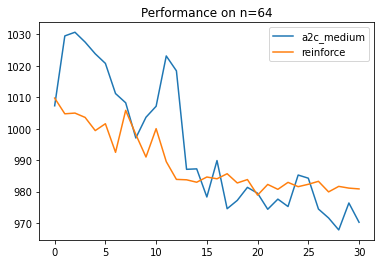

In [102]:
for agent_name in ["a2c_medium", "reinforce"]:
    plt.plot(results[agent_name, "64"], label=agent_name)
plt.legend()
plt.title("Performance on n=64")